# Hoja de Trabajo 2 - Segmentación de especies utilizando "Cluster_Analysis"

Link al repositorio de Github: https://github.com/tsc221645/CC3074_HT2

## Sección 1 - Sepal

Importación de las librerías para realizar el análisis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Generación del data frame "data" para realizar el análisis correspondiente y verificar que se puedan visualizar los datos correctamente.

In [3]:
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1. Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del sépalo

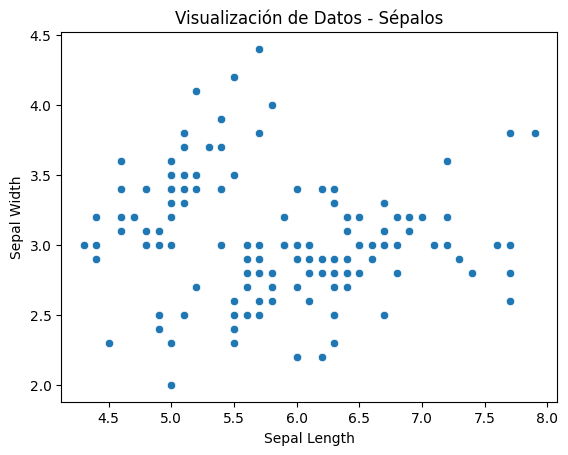

In [4]:
sns.scatterplot(x=data["sepal_length"], y=data["sepal_width"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Visualización de Datos - Sépalos")
plt.show()

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados

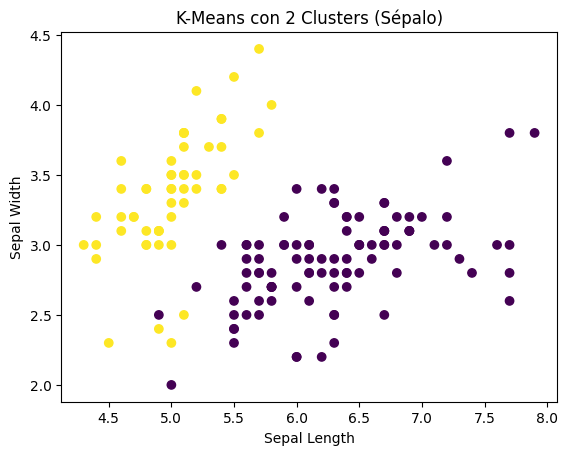

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=50)
data["cluster"] = kmeans.fit_predict(data)
plt.scatter(data["sepal_length"], data["sepal_width"], c=data["cluster"], cmap="viridis")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means con 2 Clusters (Sépalo)")
plt.show()

3. Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[["sepal_length", "sepal_width"]])
kmeans_scaled = KMeans(n_clusters=2, random_state=50)
data["cluster_scaled"] = kmeans_scaled.fit_predict(scaled_data)

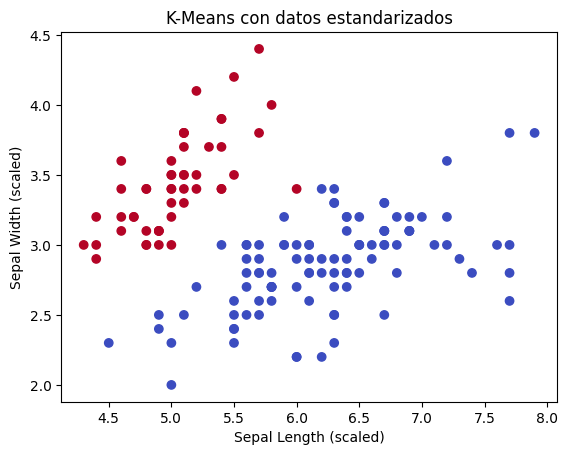

In [7]:
plt.scatter(data["sepal_length"], data["sepal_width"], c=data["cluster_scaled"], cmap="coolwarm")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.title("K-Means con datos estandarizados")
plt.show()

En la gráfica de los datos antes de estandarizar se puede observar que los datos están más agrupados en base a sus valores originales pero se muestra una dispersión desigual. La segunda imagen, luego de estandarizar, muestra que los datos están distribuidos de manera más uniforme. Asimismo, luego de estandarizar los datos se muestra que los clusters están más balanceado y más definidos entre sí.

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un
rango de 1 a 10)

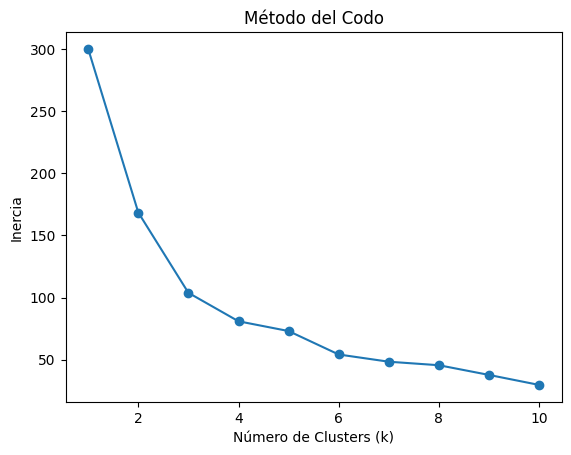

In [8]:
from sklearn.cluster import KMeans
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=50)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo")
plt.show()

En base al método del codo se podría decir que el número ideal de clusters es donde k=3. Esto tiene sentido debido a que el conjunto de datos tiene 3 especies de flores.

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos
3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

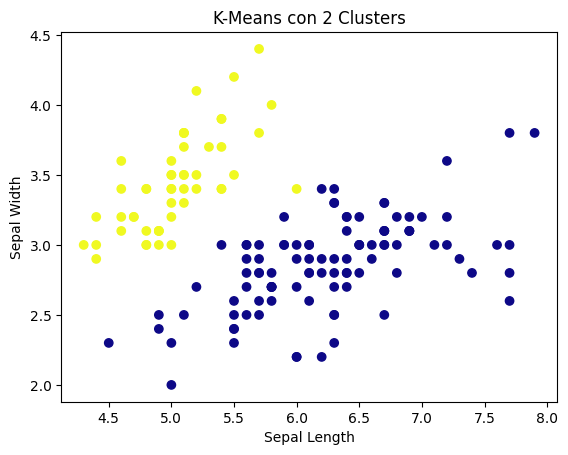

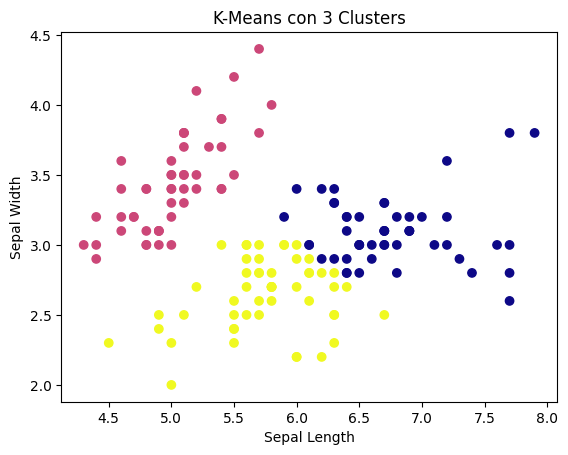

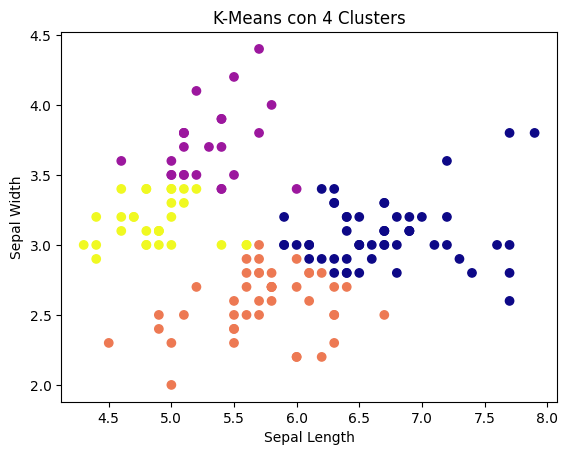

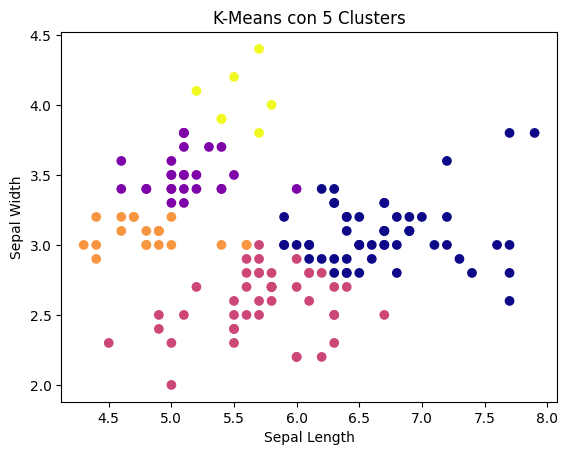

In [9]:
for k in [2, 3, 4, 5]:
    kmeans_final_petal = KMeans(n_clusters=k, random_state=50)
    data[f"cluster_k{k}"] = kmeans_final_petal.fit_predict(scaled_data)

    plt.scatter(data["sepal_length"], data["sepal_width"], c=data[f"cluster_k{k}"], cmap="plasma")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(f"K-Means con {k} Clusters")
    plt.show()

6. Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv

In [10]:
df_real = pd.read_csv("iris-con-respuestas.csv")[["sepal_length", "sepal_width", "species"]]
df_real["cluster"] = data["cluster_k3"]
comparison = pd.crosstab(df_real["species"], df_real["cluster"])
print("Tabla de comparación entre clusters y especies reales:")
print(comparison)

Tabla de comparación entre clusters y especies reales:
cluster      0   1   2
species               
setosa       0  49   1
versicolor  16   0  34
virginica   34   0  16


In [11]:
from sklearn.metrics import accuracy_score
cluster_mapping = {
    0: "virginica",
    1: "setosa",
    2: "versicolor"
}
df_real["cluster_mapped"] = df_real["cluster"].map(cluster_mapping)
accuracy = accuracy_score(df_real["species"], df_real["cluster_mapped"])
print(f"Precisión ajustada del Clustering: {accuracy * 100:.2f}%")


Precisión ajustada del Clustering: 78.00%


Utilizando K-Means se logro detectar algunos patrones utilizando solamente la forma del sépalo, obteniendo una presición del 78%. Esto nos indica que no es la mejor opción para realizar la segmentación de las especies de Iris. Para mejorar la segmentación sería recomendable agregar las caracterísitcas del pétalo. Pero efectivamente, utilizar 3 clusters nos proporcionó el mejor resultado basado en la forma del sépalo.

## Sección 2 - Petal

### Forma del pétalo 

In [12]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,cluster_scaled,cluster_k2,cluster_k3,cluster_k4,cluster_k5
0,5.1,3.5,1.4,0.2,1,1,1,1,1,1
1,4.9,3.0,1.4,0.2,1,1,1,1,3,3
2,4.7,3.2,1.3,0.2,1,1,1,1,3,3
3,4.6,3.1,1.5,0.2,1,1,1,1,3,3
4,5.0,3.6,1.4,0.2,1,1,1,1,1,1


### K-means de 2 núcleos con pétalos

In [13]:
kmeans_petal = KMeans(n_clusters=2, random_state=50)
data["cluster_petal"] = kmeans_petal.fit_predict(data[['petal_length', 'petal_width']])


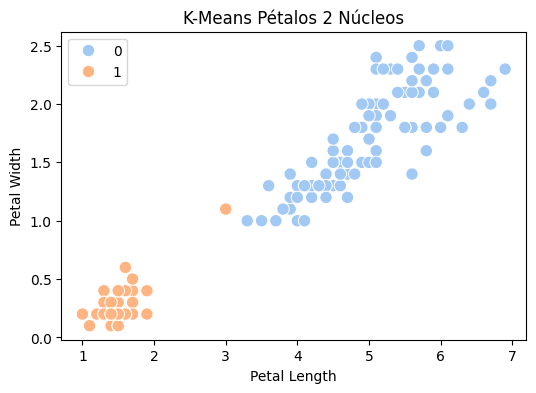

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['petal_length'], y=data['petal_width'], hue=data['cluster_petal'], palette='pastel', s=80)
plt.xlabel("Petal Length")  
plt.ylabel("Petal Width")
plt.legend()
plt.title("K-Means Pétalos 2 Núcleos")
plt.show()


Ahora con datos estandarizados

In [15]:
scaler_petal = StandardScaler()
scaled_data_petal = scaler_petal.fit_transform(data[['petal_length','petal_width']])
kmeans_scaled_petal = KMeans(n_clusters=2, random_state=50)
data['cluster_scaled_petal'] = kmeans_scaled_petal.fit_predict(scaled_data_petal)

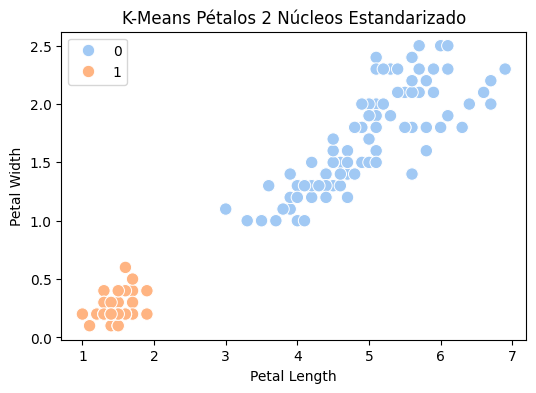

In [16]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['petal_length'], y=data['petal_width'], hue=data['cluster_scaled_petal'], palette='pastel', s=80)
plt.xlabel("Petal Length")  
plt.ylabel("Petal Width")
plt.legend()
plt.title("K-Means Pétalos 2 Núcleos Estandarizado")
plt.show()

### Diferencias
La diferencia más notable entre los k-means estandarizados y no estandarizados es que al estandarizar hay mayor agrupación entre los datos y los clusters. Por ejemplo, en el caso de los pétalos los clusters tienen los datos más concentrados, al menos en el caso del cluster 1 a comparación de no estandarizado. 

### Método del Codo

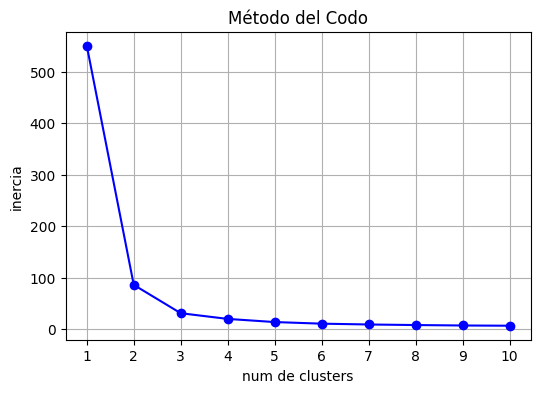

In [17]:
inertia = []
K = range(1,11) # elegir un rango de clusters

X = data[['petal_length', 'petal_width']]
for k in K:
    kmeans_petal = KMeans(n_clusters=k, random_state=50)
    kmeans_petal.fit(X)
    inertia.append(kmeans_petal.inertia_) # agregar la inercia de cada cluster

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('num de clusters')
plt.ylabel('inercia')
plt.title('Método del Codo')
plt.xticks(K)
plt.grid()
plt.show()


Como podemos ver en la gráfica usando wl WCSS para estimar el número óptimo de clusters, tenemos que es 3, ya que es donde el cambio va siendo menos gradual a lo largo del número de clusters.

## Realizando distintas gráficas de clusters 

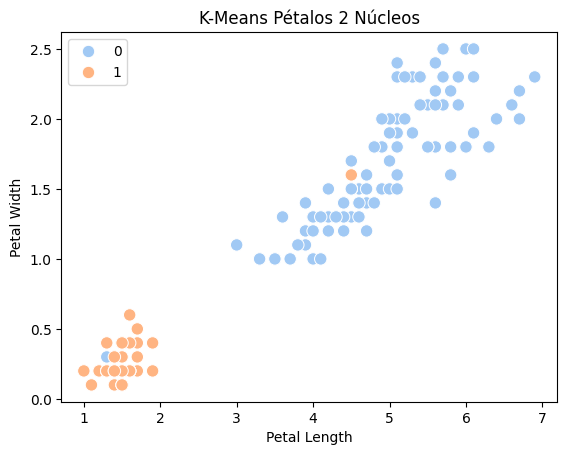

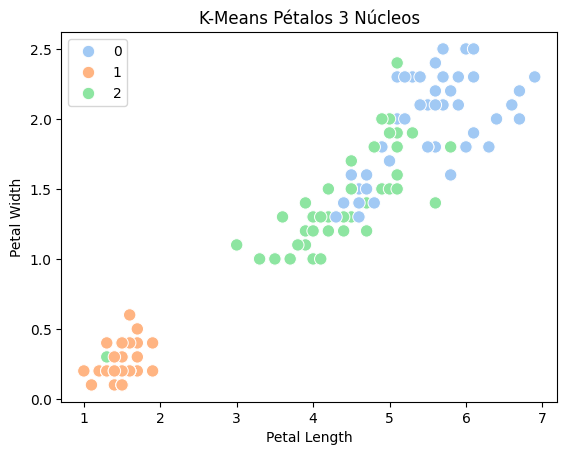

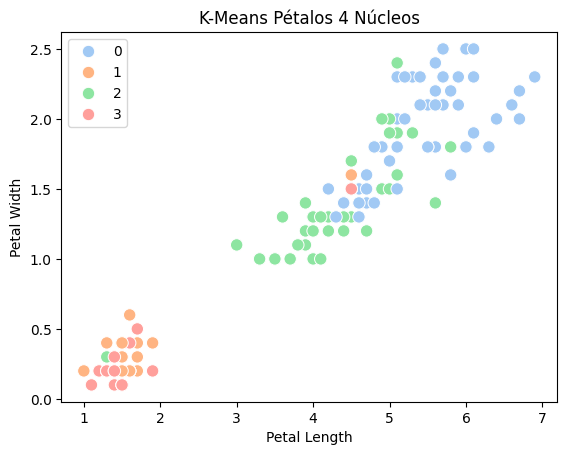

In [18]:
# para k=[2,3,4,5]
for k in range(2,5):
    kmeans_final_petal = KMeans(n_clusters=k, random_state=50)
    data[f"cluster_petal_{k}"] = kmeans_final_petal.fit_predict(scaled_data)
    sns.scatterplot(x=data["petal_length"], y=data['petal_width'], hue=data[f"cluster_petal_{k}"], palette='pastel', s=80)
    plt.xlabel("Petal Length")  
    plt.ylabel("Petal Width")
    plt.legend()
    plt.title(f"K-Means Pétalos {k} Núcleos")
    plt.show()

### Comparar datos reales

In [19]:
df_real = pd.read_csv("iris-con-respuestas.csv")[["petal_length", "petal_width", "species"]]
df_real["cluster"] = data["cluster_petal_3"]
comparison = pd.crosstab(df_real["species"], df_real["cluster"])
print("Tabla de comparación entre clusters y especies reales:")
print(comparison)

Tabla de comparación entre clusters y especies reales:
cluster      0   1   2
species               
setosa       0  49   1
versicolor  16   0  34
virginica   34   0  16


In [20]:
cluster_mapping = {
    0: "virginica",
    1: "setosa",
    2: "versicolor"
}
df_real["cluster_mapped_petal"] = df_real["cluster"].map(cluster_mapping)
accuracy = accuracy_score(df_real["species"], df_real["cluster_mapped_petal"])
print(f"Precisión ajustada del Clustering: {accuracy * 100:.2f}%")

Precisión ajustada del Clustering: 78.00%


## Sección 3 - Kneed
Emplear la librería Kneed para estimar clusters y comparar datos

In [21]:
#pip install kneed 

In [22]:
from kneed import KneeLocator
inertia = []
K = range(1,11) 
X = data[['petal_length', 'petal_width',"sepal_length", "sepal_width"]]
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=50)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) # agregar la inercia de cada cluster
knee_locator = KneeLocator(K, inertia, curve='convex', direction='decreasing') # instanciamos el Knee Locator
optimal_k = knee_locator.elbow

print(f"Número óptimo de clusters: {optimal_k}")



Número óptimo de clusters: 3


Comparación de los clusters generados con las especies reales creando un dataframe (df_real) en base a los datos de iris-con-respuestas.csv. Esto permite analizar si el clustering se realizó correctamente o si requiere de algún ajuste.

In [23]:
df_real = pd.read_csv("iris-con-respuestas.csv")  
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=50)
df_real["cluster_kneed"] = kmeans_optimal.fit_predict(df_real[['petal_length', 'petal_width',"sepal_length", "sepal_width"]])
comparison_kneed = pd.crosstab(df_real["species"], df_real["cluster_kneed"])
print("Tabla de comparación entre clusters y especies reales:")
print(comparison_kneed)

Tabla de comparación entre clusters y especies reales:
cluster_kneed   0   1   2
species                  
setosa          0  50   0
versicolor     48   0   2
virginica      14   0  36


Corrección de la asignación de los clusters generados por K-Means y cálculo de la precisión comparando los clusters con las etiquetas reales de las especies de Iris.

In [24]:
from sklearn.metrics import accuracy_score

cluster_mapping = {
    0: "versicolor",   
    1: "setosa",       
    2: "virginica"     
}
df_real["cluster_mapped"] = df_real["cluster_kneed"].map(cluster_mapping)
accuracy = accuracy_score(df_real["species"], df_real["cluster_mapped"])
print(f"Precisión ajustada del Clustering con kneed: {accuracy * 100:.2f}%")

Precisión ajustada del Clustering con kneed: 89.33%


Análisis de las diferencias encontradas: El método kneed determinó un número óptimo de k=3, lo que resulta ser consistente con el dataset utilizado ya que se sabe que hay tres especies de Iris. Inicialmente los clusters generados por K-Means no coincidían directamente con las etiquetas. Versicolor y Virginica se encontraban mezcladas en los clusters, lo que llegó a dar una precisión del 24%. Ante esto se realizó una tabla de compraración entre clusters y especies reales utilizando pd.crosstab(), lo que permitió reasignar los clusters de forma correcta. Al aplicar la corrección la precisión del clustering aumento significativamente a 89.33% lo que refleja una segmentación exitosa.

Se podría argumentar que el método de kneed fue bastante útil para determinar que k=3, pero los resultados iniciales no fueron exactos debido a la asignación arbitraria de los clusters lo que requirió de una corrección en el mapeo.

# Análisis Adicional

### Distribución de variables por especie

Distribución de variables por especie permite ver la distribución de las características presentadas (sepal_length, sepal_width, petal_length, petal_width) en cada especie.Esto permite poder realizar la detección de patrones entre las especies y a identificar la relevancia de los atributos.

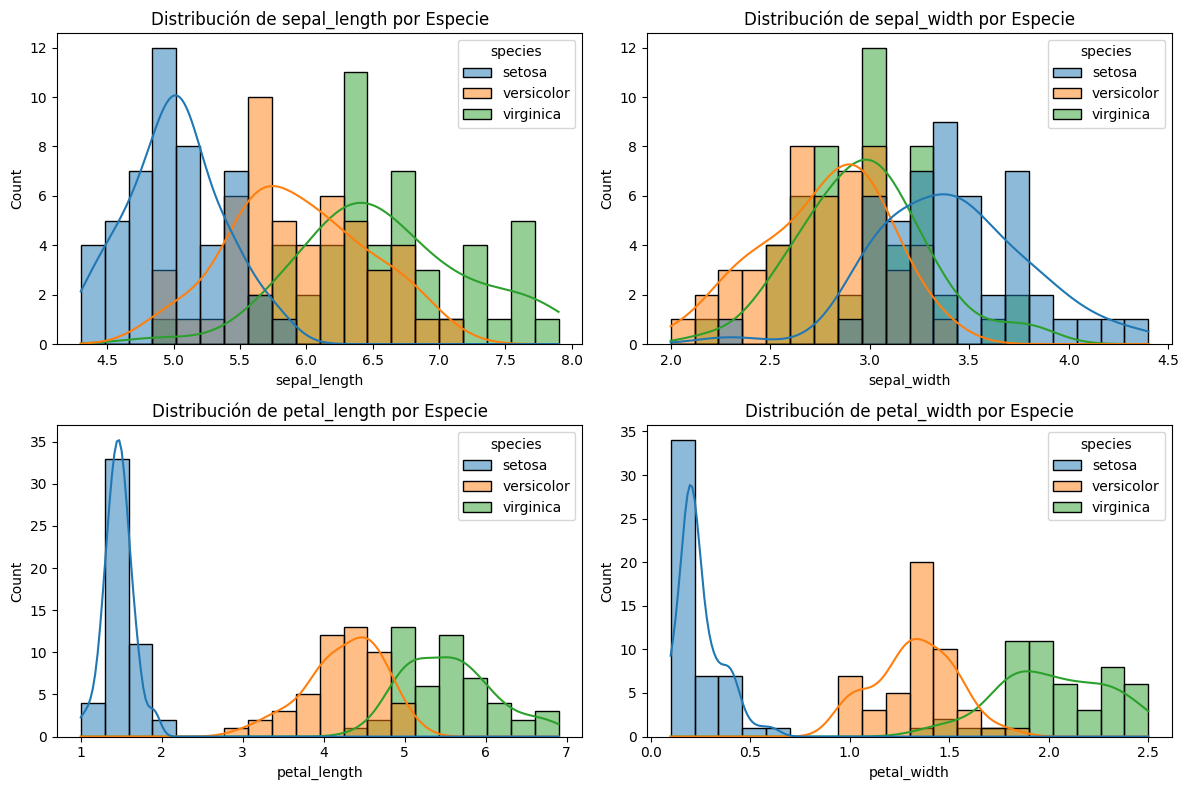

In [25]:
# variables a tomar en cuenta
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
#Graficar las distribuciones de cada variable segun las 3 especies presentes
plt.figure(figsize=(12,8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df_real, x=feature, hue="species", kde=True, bins=20)
    plt.title(f"Distribución de {feature} por Especie")

plt.tight_layout()
plt.show()

Para sepal_length se pude observar que Setosa tiene los alores más pequeños (4.3 a 5.8) mientras que Versicolor y Virginca se encuentran entre (5.5 a 7.5) bastante similares entre sí.

Para sepal_width setosa muestra una mayor variabilidad (2.5 a 4.0), con una superposición de Versicolor y de Virginica.

Para petal_length se observa que setosa se separa completamente de las otras 2 especies, sin ninguna superposición alguna. Versicolor y Virginica tienen una superposición pero es menor que lo observado en el sepalo.

Por último, para petal_width se muestra que Setosa es la única con valores menores a 0.5 y Versicolor y Virginica muestran una mejor separación a comparación de las otras variables.

Se podría argumentar que tanto petal_length y petal_width son mejores variables que sepal_length y sepal_width para separar las especies.

### Análisis de correlación entre variables

El análisis de correlación entre variables permite ver que tan relacionadas están las variables entre sí. Esto permite observar si existe redundancia entre los mismos atributos para su posible eliminación

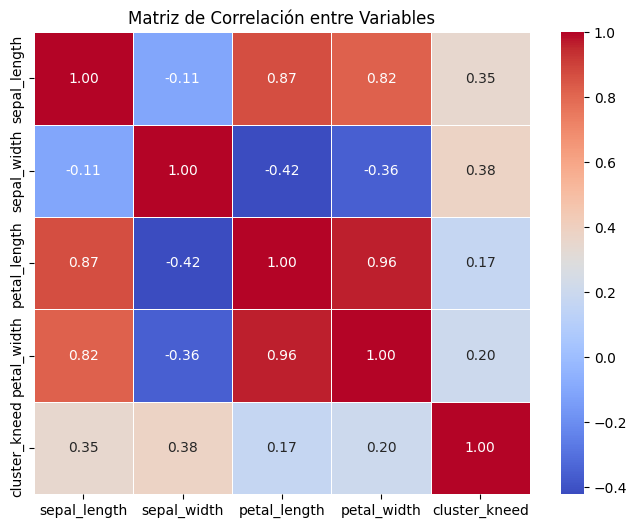

In [30]:


# Convertir todas las columnas a su tipo correcto y eliminar variables no numéricas
df_corr = df_real.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()


La matriz de correlación entre variables nos permite observar que tanto petal_length como petal_width estan altamente correlacionadas al igual que sepal_length y petal length. Es importante notar que este también es el caso para sepal_length y petal_width.

Asimismo, se puede observar que hay correlaciones débiles como lo es sepal_width y petal_length, al igual que sepal_width y petal_width.

## Conclusiones

1. Tanto en la sección 1 como en la sección 2 se obtuvo una precisión cercana al 78% y el método del codo indico que k=3 para el número óptimo de clusters. La estandarización de datos ayudó a balancear las variables pero no eliminó el solapamiento por completo

2. Kneed confirmó que k=3 era el mejor número de clusters, validando el método del codo utilizado anteriormente. Asimismo se obtuvo una mayor precisión cercana al 89.33% luego del mapeo de los clusters.

3. Por medio del análisis de correlación se podría argumentar que petal_length y petal_width se podrían eliminar debido a su alta correlación de alrededor de 0.96-